In [59]:
import pandas as pd
from statsmodels.tsa.api import Holt , ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [60]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [61]:
y = df['Monthly beer production']

In [62]:
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

## Arima

In [64]:
model = auto_arima(y_train , trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3952.461, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4070.292, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4047.060, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4037.367, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4068.306, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4013.976, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4028.080, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3953.392, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3954.005, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3957.114, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3960.438, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3958.799, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3953.794, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

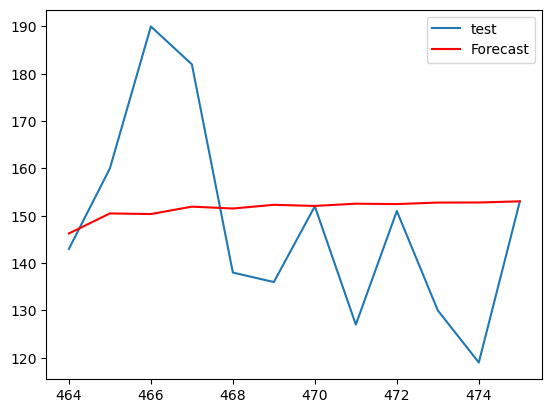

rmse 21.101241848406183


In [65]:
forecast = model.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(50,100,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()
print('rmse', rmse)

## Sarima 

In [67]:
s_model = auto_arima(y_train , trace=True, error_action='ignore',suppress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3467.905, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4070.292, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3807.869, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3839.739, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4068.306, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3799.097, Time=0.41 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3476.791, Time=2.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3466.758, Time=2.26 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3715.554, Time=1.07 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3470.930, Time=2.05 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=3468.534, Time=2.43 sec
 ARIMA(2,1,3)(1,0,2)[12] intercept

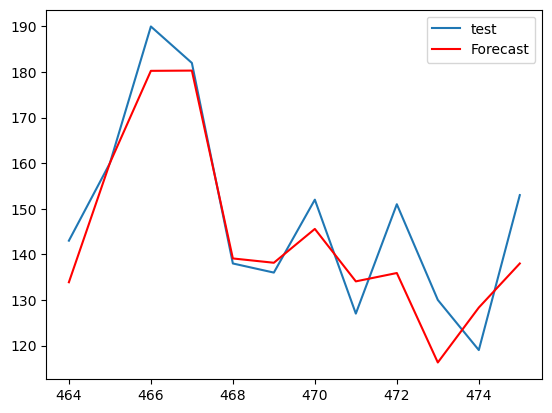

rmse 9.156543921109002


In [68]:
forecast = s_model.predict(n_periods=len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(50,100,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()
print('rmse', rmse)

## Holt Winters Additive 

rmse 8.405696159687322


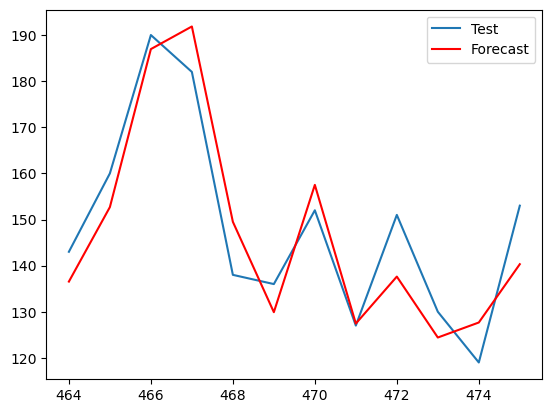

In [113]:
alpha , beta , gamma = 0.75,0.02, 0.6
ex = ExponentialSmoothing(y_train,seasonal_periods=12,trend = 'add' , seasonal='add')
model = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = model.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
# plt.text(50,200,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')
print('rmse', rmse)

## Holt Winters Multiplicative

8.324248345425328


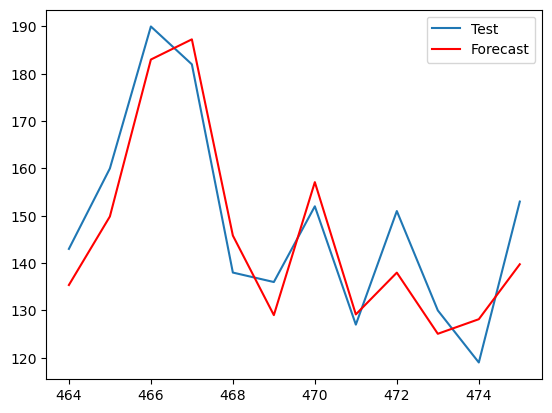

In [115]:
alpha, beta , gamma = 0.75,0.02, 0.6
ex = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add' , seasonal='mul')
fit1 = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
# plt.text(50,200,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')
print(rmse)

# DownSampling 

In [93]:
df = pd.read_csv('monthly-beer-production-in-austr.csv', index_col=0)
df.index = pd.to_datetime(df.index).to_period('m')
df

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_7508\3454372992.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df.index = pd.to_datetime(df.index).to_period('m')


,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9
...,...
1995-04,127.0
1995-05,151.0
1995-06,130.0


In [ ]:
y = df['Monthly beer production']
y_train = y[:-12]
y_test = y[-12:]


In [99]:
downsample = df.resample('Q').mean()
downsample

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_7508\2391939162.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  downsample = df.resample('Q').mean()


,Monthly beer production
Month,
1956Q1,94.800000
1956Q2,70.933333
1956Q3,75.633333
1956Q4,102.800000
1957Q1,87.333333
...,...
1994Q3,137.666667
1994Q4,177.333333
1995Q1,142.000000


In [103]:
downsample.index.rename('Quarterly', inplace=True)


,Monthly beer production
Quarterly,
1956Q1,94.800000
1956Q2,70.933333
1956Q3,75.633333
1956Q4,102.800000
1957Q1,87.333333
...,...
1994Q3,137.666667
1994Q4,177.333333
1995Q1,142.000000


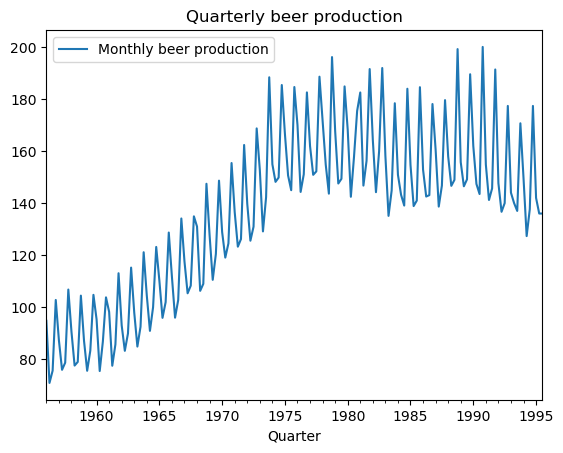

In [111]:
downsample.plot()
plt.title('Quarterly beer production')
plt.xlabel('Quarter')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=3944.900, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=4070.292, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=4040.884, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=4025.334, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=4068.306, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=3943.862, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=3952.461, Time=0.24 sec
 ARIMA(2,1,2)(0,0,2)[4] intercept   : AIC=3881.391, Time=0.69 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=3840.647, Time=1.05 sec
 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=3534.472, Time=0.97 sec
 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=3718.287, Time=0.94 sec
 ARIMA(1,1,2)(2,0,2)[4] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,1,1)(2,0,2)[4] intercept   : AIC=3537.383, Time=0.91 sec
 ARIMA(3,1,2)(2,0,2)[4] intercept   : AIC=3533.359, Time=1.03 sec
 ARIMA(3,1,2)(1,0,2)[4] intercept   : 

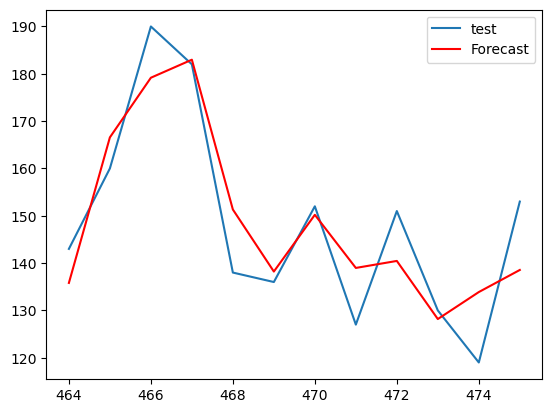

9.517504872345961


In [123]:
model = auto_arima(y_train,trace=True , error_action='ignore', suppress_warnings=True , seasonal=True , m=4)
forecast = model.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(164,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()
print(rmse)